In [8]:

#hide
! [ -e /content ] && pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz==1.4.1
import fastbook
fastbook.setup_book()

In [7]:

#hide
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [9]:
#hide
! [ -e /content ] && pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz==1.4.1
import fastbook
import os

# Modify the fastbook setup to accommodate the actual mount path
def custom_setup_colab():
  """
  Custom setup for Google Colab to use the correct mount path.
  """
  gdrive = Path('/content/drive/My Drive') # Use the correct path where Google Drive is mounted
  from google.colab import drive
  if not gdrive.exists():
    drive.mount(str(gdrive.parent))

# Replace the original setup function with the custom one
fastbook.setup_colab = custom_setup_colab

fastbook.setup_book()

In [10]:
from google.colab import drive
drive.mount('/content/drive')

# Create the .kaggle directory in Colab
!mkdir -p ~/.kaggle

!cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:

#hide
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8



In [12]:
from fastai.imports import *
np.set_printoptions(linewidth=130)

In [13]:
!pip install kaggle


In [14]:
!kaggle datasets download -d yaminh/bank-marketing-campaign-dataset


Dataset URL: https://www.kaggle.com/datasets/yaminh/bank-marketing-campaign-dataset
License(s): apache-2.0
  0% 0.00/447k [00:00<?, ?B/s]
100% 447k/447k [00:00<00:00, 57.6MB/s]


In [15]:
!chmod 600 ~/.kaggle/kaggle.json

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#df = pd.read_csv('bank-marketing-campaign-dataset.csv')


In [18]:
import os
os.listdir()

['.config', 'bank-marketing-campaign-dataset.zip', 'drive', 'sample_data']

In [19]:
import zipfile

with zipfile.ZipFile('bank-marketing-campaign-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [20]:
df = pd.read_csv('dataset.csv')


In [21]:
os.listdir()


['.config',
 'bank-marketing-campaign-dataset.zip',
 'drive',
 'dataset.csv',
 'sample_data']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 45211 non-null  object
 1   age                        45211 non-null  int64 
 2   education_level            45211 non-null  object
 3   marital_status             45211 non-null  object
 4   communication_channel      45211 non-null  object
 5   call_month                 45211 non-null  object
 6   call_day                   45211 non-null  int64 
 7   call_duration              45211 non-null  int64 
 8   call_frequency             45211 non-null  int64 
 9   previous_campaign_outcome  45211 non-null  object
 10  conversion_status          45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [23]:
df.head()


,occupation,age,education_level,marital_status,...,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,...,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,...,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,...,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,...,72,5,unidentified,not_converted
4,business_owner,43,college,married,...,184,4,unidentified,not_converted


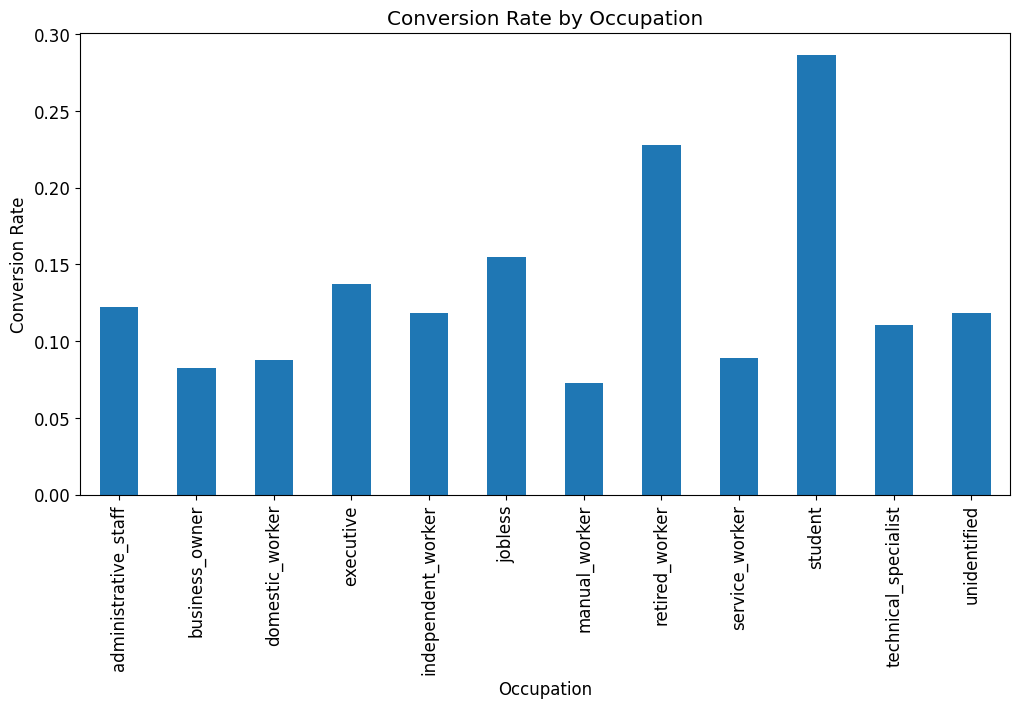

In [24]:
# @title Conversion Rate by Occupation

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'df'

conversion_rate = df.groupby('occupation')['conversion_status'].value_counts(normalize=True).unstack()
conversion_rate['converted'].plot(kind='bar', figsize=(12, 6))
plt.xlabel('Occupation')
plt.ylabel('Conversion Rate')
_ = plt.title('Conversion Rate by Occupation')

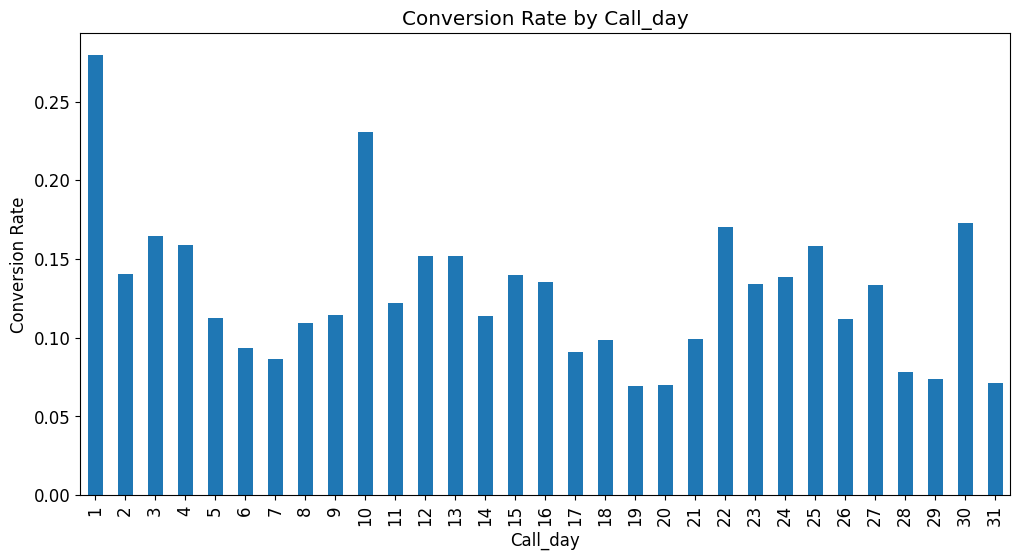

In [25]:
conversion_rate = df.groupby('call_day')['conversion_status'].value_counts(normalize=True).unstack()
conversion_rate['converted'].plot(kind='bar', figsize=(12, 6))
plt.xlabel('Call_day')
plt.ylabel('Conversion Rate')
_ = plt.title('Conversion Rate by Call_day')

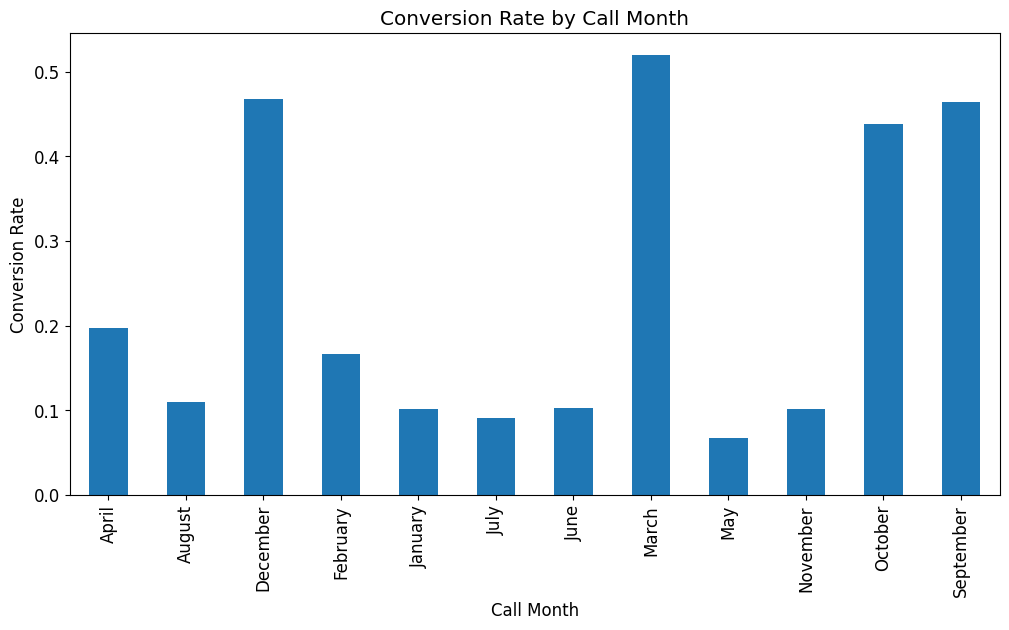

In [26]:
conversion_rate = df.groupby('call_month')['conversion_status'].value_counts(normalize=True).unstack()
conversion_rate['converted'].plot(kind='bar', figsize=(12, 6))
plt.xlabel('Call Month')
plt.ylabel('Conversion Rate')
_ = plt.title('Conversion Rate by Call Month')

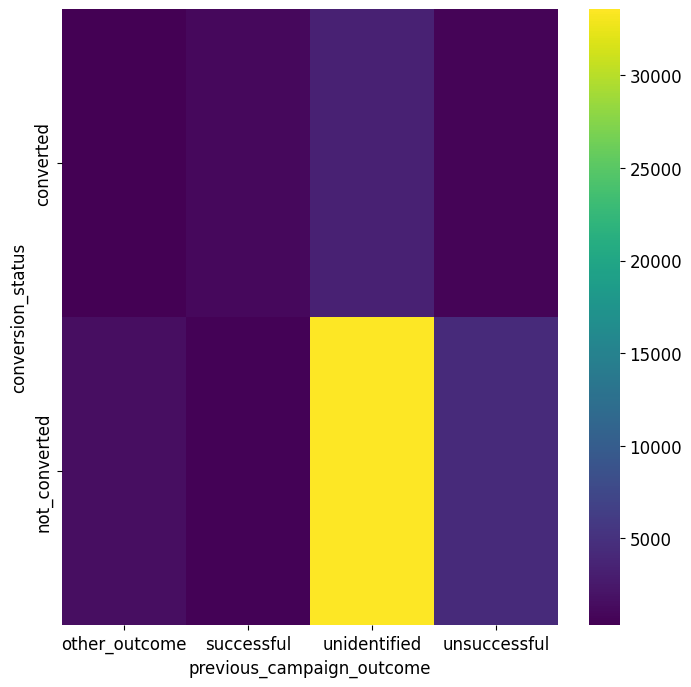

In [27]:
# @title previous_campaign_outcome vs conversion_status

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['conversion_status'].value_counts()
    for x_label, grp in df.groupby('previous_campaign_outcome')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('previous_campaign_outcome')
_ = plt.ylabel('conversion_status')

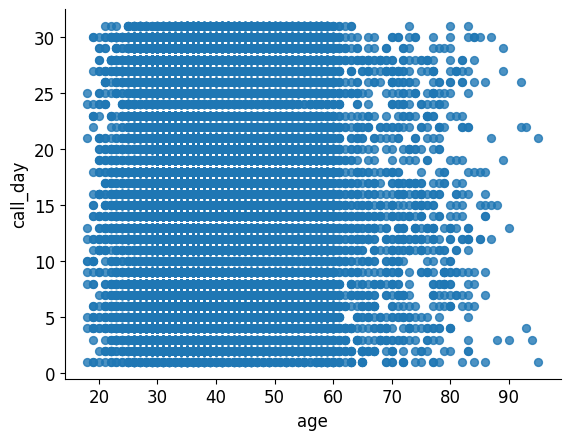

In [28]:
# @title age vs call_day

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='age', y='call_day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

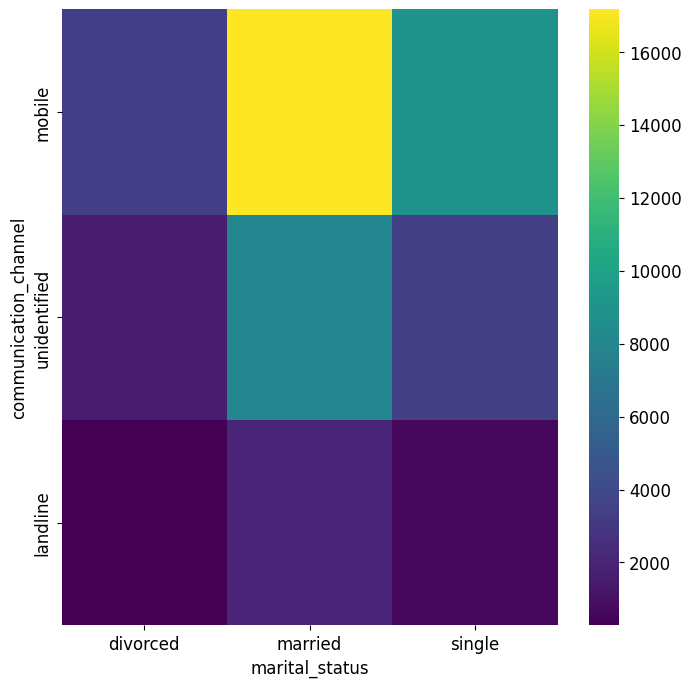

In [29]:
# @title marital_status vs communication_channel

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['communication_channel'].value_counts()
    for x_label, grp in df.groupby('marital_status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('marital_status')
_ = plt.ylabel('communication_channel')

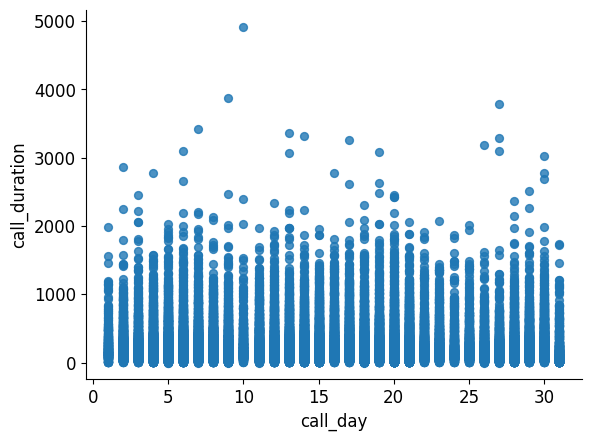

In [30]:
# @title call_day vs call_duration

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='call_day', y='call_duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [31]:
 # Map month names to month numbers
 months = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8,
           "September": 9,
           "October": 10, "November": 11, "December": 12}
 df['month'] = df['call_month'].apply(lambda x: months[x])

In [32]:
df.describe()

,age,call_day,call_duration,call_frequency,month
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841,6.144655
std,10.618762,8.322476,257.527812,3.098021,2.408034
min,18.000000,1.000000,0.000000,1.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000,5.000000
50%,39.000000,16.000000,180.000000,2.000000,6.000000
75%,48.000000,21.000000,319.000000,3.000000,8.000000
max,95.000000,31.000000,4918.000000,63.000000,12.000000


In [33]:
# Display how many entries in this column are unidentified
df['previous_campaign_outcome'].value_counts().get('unidentified', 0)

36959

In [34]:
df['previous_campaign_outcome'].value_counts().get('successful', 0)

1511

In [35]:
df['previous_campaign_outcome'].value_counts().get('unsuccessful', 0)

4901

In [36]:
# Drop call_month
df = df.drop('call_month', axis=1)

In [37]:
# Use correct month ordering (Jan = 1, Feb = 2, etc)
#df['call_month'] = df['call_month'].astype('category')
#df['call_month'] = df['call_month'].cat.set_categories(months, ordered=True)

In [38]:
# Create two transforms:
# Categorify to convert the categorical data to numeric data
# FillMissing fills in missing data
from fastai.tabular.all import Categorify, FillMissing, FillStrategy

# Specify 'unidentified' as the value for missing entries
procs = [Categorify, FillMissing]
#procs = [Categorify, FillMissing(fill_strategy=FillStrategy.constant, add_col={'previous_campaign_outcome': 'unidentified'})]

In [39]:
# If month is January-October, split to training set.
# If month is November-December, split to validation set.
#cond = (df.month<11)
#train_idx = np.where( cond)[0]
#valid_idx = np.where(~cond)[0]

#splits = (list(train_idx),list(valid_idx))

In [40]:
# Randomly split data
from fastai.data.transforms import RandomSplitter

# Use RandomSplitter to split the dataset randomly
# Split 20% for validation (can adjust the proportion as needed)
splits = RandomSplitter(valid_pct=0.2)(range_of(df))


In [41]:
# The variable to predict is conversion status
dep_var = 'conversion_status'

In [42]:
# Tell Tabular Pandas which columns are continuous vs categorical
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [43]:
print(cat)

['occupation', 'education_level', 'marital_status', 'communication_channel', 'previous_campaign_outcome']


In [44]:
print(cont)

['age', 'call_day', 'call_duration', 'call_frequency', 'month']


In [45]:
# Check length of each set
len(to.train),len(to.valid)


(36169, 9042)

In [46]:
#hide_output
to.show(3)

,occupation,education_level,marital_status,communication_channel,previous_campaign_outcome,age,call_day,call_duration,call_frequency,month,conversion_status
10289,manual_worker,elementary_school,married,mobile,unidentified,28,7,209,1,7,not_converted
23508,executive,college,married,mobile,unidentified,31,16,255,2,7,not_converted
10573,administrative_staff,high_school,single,mobile,unsuccessful,41,15,77,2,5,not_converted


In [47]:
# Check that categorical data is now numeric
#hide_output
#to.items.head(3)

In [48]:
# Define our indepedent and dependent variables
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [49]:
# Create a decision tree, set max leaf nodes to 4
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

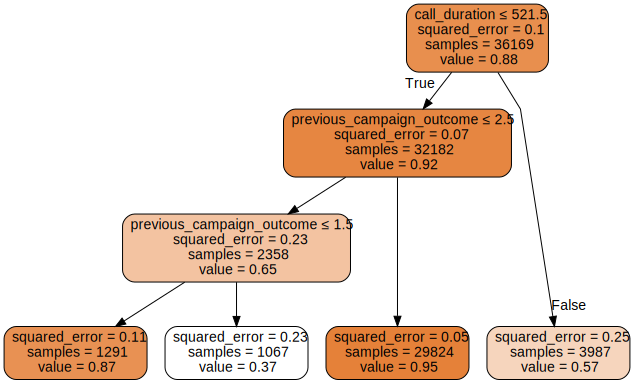

In [50]:
# Display tree
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

In [51]:
# Run Decision Tree Regressor where each leaf node must include 25 records
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(xs, y);


In [52]:
# Define root mean squared functions
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [53]:
# Calculate RMSE with validation set
m_rmse(m, valid_xs, valid_y)

0.269162

In [54]:
m.get_n_leaves(), len(xs)

(548, 36169)

In [55]:
# Create a random forest
def rf(xs, y, n_estimators=40, max_samples=200_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=36169, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)
m = rf(xs, y);

In [56]:
# Calculate RMSE with training set
m_rmse(m, xs, y)

0.195775

In [57]:
# Calculate RMSE with validation set
m_rmse(m, valid_xs, valid_y)

0.25538

In [58]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

In [59]:
# Calculate RMSE with validation set
r_mse(preds.mean(0), valid_y)

0.25538

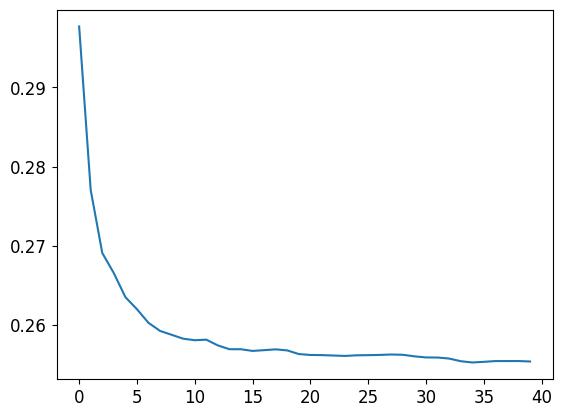

In [60]:
# Plot RMSE as we add more trees
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [61]:
# Calculate Out of Bag Error
#r_mse(m.oob_prediction_, y)

In [62]:
# 40 trees and 4184 records in the validation set
preds.shape

(40, 9042)

In [63]:
preds_std = preds.std(0)

In [64]:
# Define function for feature importance
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [65]:
# Importance of each feature
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
7,call_duration,0.376858
4,previous_campaign_outcome,0.142737
6,call_day,0.117638
5,age,0.111457
9,month,0.107909
0,occupation,0.039752
8,call_frequency,0.032725
3,communication_channel,0.029192
1,education_level,0.023544
2,marital_status,0.018188


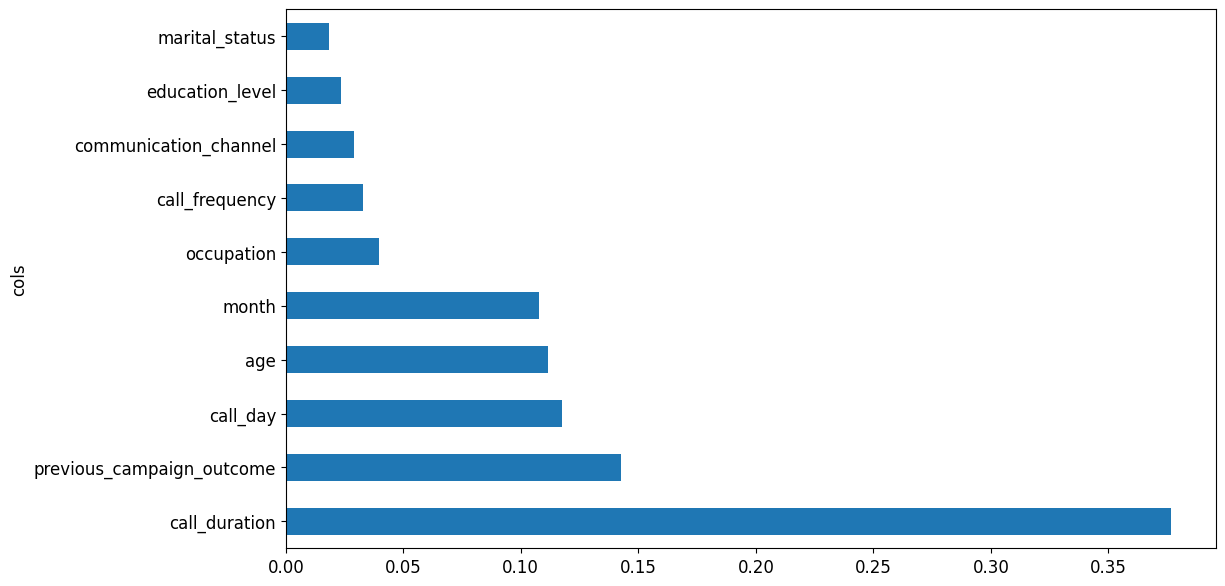

In [66]:
# Plot relative feature importance
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [67]:
# Drop attributes with a feature importance less than 0.026 (marital status)
#to_keep = fi[fi.imp>0.026].cols
#len(to_keep)

In [68]:
# Retrain our model and improve it
xs_imp = xs #[to_keep]
valid_xs_imp = valid_xs #[to_keep]
#m = rf(xs_imp, y)

In [69]:
# Calculate RMSE for training set and validation set
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.195775, 0.25538)

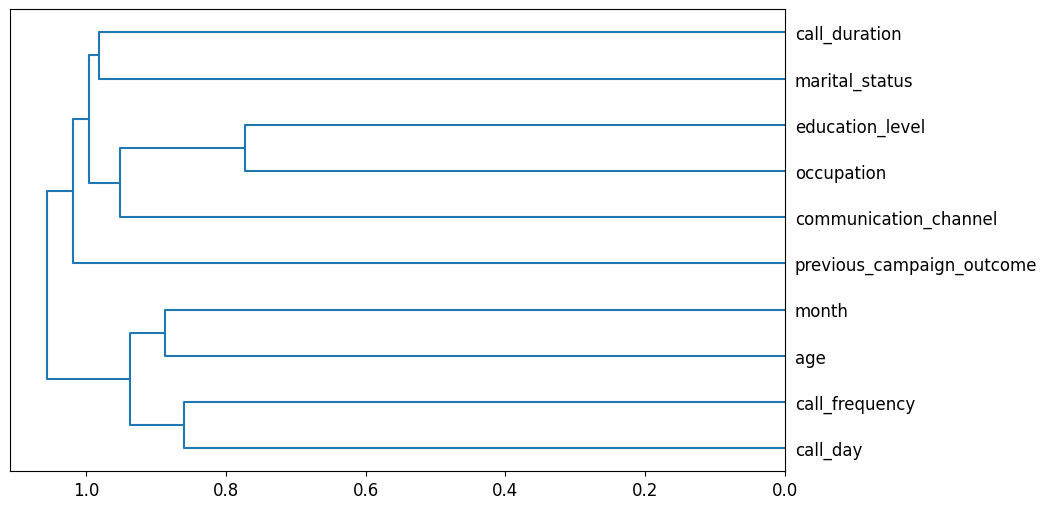

In [70]:
# Generate chart of features
cluster_columns(xs_imp)

In [71]:
# Define function to calculate out of bag score
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=41027, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [72]:
# Calculate out of bag score
#get_oob(xs_imp)

In [73]:
#hide
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [74]:
# Pick first few rows of validation set
row = xs_imp.iloc[:5]

In [75]:
# Pass the row to tree interpreter
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [76]:
# Prediction, bias, and contributions for first row
prediction[0], bias[0], contributions[0].sum()

(array([0.98541667]), 0.8835190356382538, 0.10189763102841293)

In [77]:
xs_imp.columns

Index(['occupation', 'education_level', 'marital_status',
       'communication_channel', 'previous_campaign_outcome', 'age', 'call_day',
       'call_duration', 'call_frequency', 'month'],
      dtype='object')

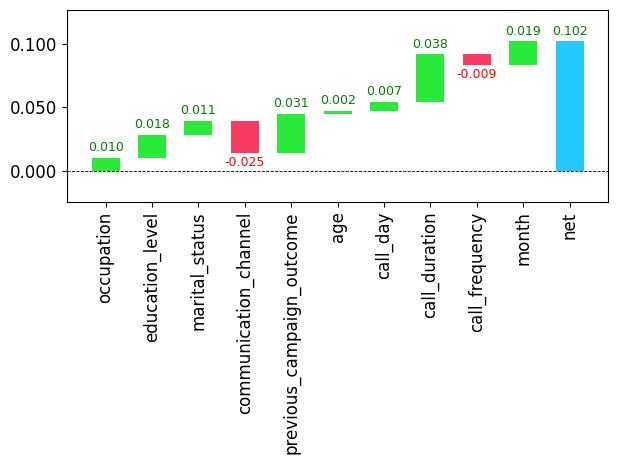

In [78]:
# Waterfall plot
waterfall(xs_imp.columns, contributions[0], #threshold=0.08,
          rotation_value=90,formatting='{:,.3f}');


In [79]:
# Neural network model

In [80]:
# check values  of "conversion_status" column
print(df[dep_var].unique())

['not_converted' 'converted']


In [81]:
# Convert "not_converted" and "converted" to 0 and 1
df[dep_var] = df[dep_var].apply(lambda x: 1 if x == 'converted' else 0)

In [82]:
# check the values are only 0 or 1
print(df[dep_var].unique())

[0 1]


In [83]:
# convert to float32 type
df[dep_var] = df[dep_var].astype('float32')

In [84]:
# Process data using TabularPandas
cont_nn,cat_nn = cont_cat_split(df, 1, dep_var=dep_var)
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df, procs_nn, cat_nn, cont_nn, y_names=dep_var, splits=splits)

In [85]:
# Check the data types of each column in the to_nn DataFrame
print(to_nn.items.dtypes)

occupation                      int8
age                          float64
education_level                 int8
marital_status                  int8
communication_channel           int8
call_day                     float64
call_duration                float64
call_frequency               float64
previous_campaign_outcome       int8
conversion_status            float32
month                        float64
dtype: object


In [86]:
# Load a batch of data
dls = to_nn.dataloaders(1024)

In [87]:
# Define binary accuracy function
import torch

def binary_accuracy(input, target):
    # Apply sigmoid to convert logits to probabilities
    probs = torch.sigmoid(input)
    # Convert probabilities to binary (0/1) by applying a threshold of 0.5
    preds = (probs > 0.5).float()
    # Calculate accuracy by comparing predictions with the actual target
    return (preds == target).float().mean()

In [88]:
# Set up neural net model
from fastai.metrics import accuracy
learn = tabular_learner(dls,layers=[500,250],
                        n_out=1, loss_func=F.binary_cross_entropy_with_logits,
                        metrics=binary_accuracy)

SuggestedLRs(valley=0.0006918309954926372)

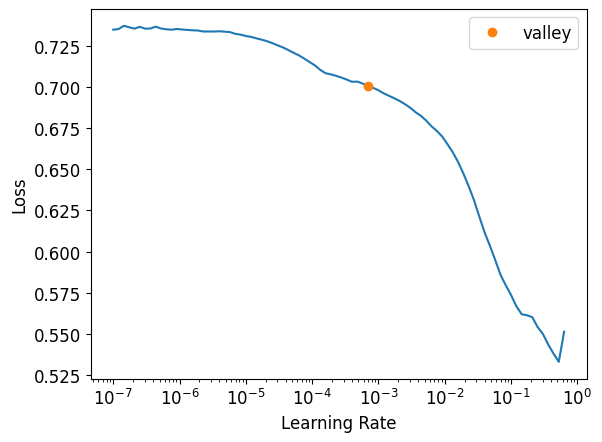

In [89]:
# Find suggested learned rate
learn.lr_find()

In [90]:
# Traing the model for a few epochs
learn.fit_one_cycle(10, 0.00758)

epoch,train_loss,valid_loss,binary_accuracy,time
0,0.618915,0.514531,0.855895,00:03
1,0.421115,0.282926,0.885092,00:02
2,0.313270,0.230267,0.898916,00:02
3,0.261472,0.227757,0.899690,00:01
4,0.233052,0.214973,0.907321,00:01
5,0.217709,0.223209,0.904004,00:01
6,0.209408,0.215100,0.905220,00:01
7,0.201723,0.216652,0.904004,00:01
8,0.196914,0.210296,0.904999,00:01
9,0.193525,0.210008,0.905331,00:01
